In [1]:
from sympy import *
from sympy.solvers.solveset import linsolve
init_printing()
import numpy as np
t, T, epsilon = symbols('t T epsilon')

def Fun_t(f):
    return Function(f)(t)

def Fun_T(f):
    return Function(f)(T)

# Outer expansion

Define the outer series

\begin{align}
R_2 &= R_2^{(0)} + \varepsilon R_2^{(1)} + \varepsilon^2 R_2^{(2)} + \mathcal{O}(\varepsilon^3)\\
Q_2 &= Q_2^{(0)} + \varepsilon Q_2^{(1)} + \varepsilon^2 Q_2^{(2)} + \mathcal{O}(\varepsilon^3)\
\end{align}

In [2]:
R20,  R21, R22, Q20, Q21, Q22 = map(Fun_t,['R_2^{(0)}', 'R_2^{(1)}', 'R_2^{(2)}', 'Q_2^{(0)}', 'Q_2^{(1)}', 'Q_2^{(2)}'])
R30,  R31, R32, Q40, Q41, Q42 = map(Fun_t,['R_3^{(0)}', 'R_3^{(1)}', 'R_3^{(2)}', 'Q_4^{(0)}', 'Q_4^{(1)}', 'Q_4^{(2)}'])

Ca_er, Ca_cyt, H_er, H_cyt = map(Fun_t,['Ca_er', 'Ca_cyt', 'H_er', 'H_cyt'])
R2 = R20 + epsilon*R21 + epsilon**2*R22 +Order(epsilon**3)
R3 = R30 + epsilon*R31 + epsilon**2*R32 +Order(epsilon**3)

Q2 = Q20 + epsilon*Q21 + epsilon**2*Q22 +Order(epsilon**3)
Q4 = Q40 + epsilon*Q41 + epsilon**2*Q42 +Order(epsilon**3)

q1p, q1m, q20p, q20m, q3p, q3m, q40p, q40m, q5p, q5m =  map(Fun_t,['q_1^+', 'q_1^-', 'q_{20}^+', 'q_{20}^-', 'q_3^+', 'q_3^-', 'q_{40}^+', 'q_{40}^-', 'q_5^+', 'q_5^-'])
k1p, k2p, k3p, k1m, k2m, k3m = symbols('k_1^+ k_2^+ k_3^+ k_1^- k_2^- k_3^-')


## Outer ODEs

Defining $R_2 = Q_2 +Q_3$ and $R_3 = Q_4 + Q_5,$
the three state model has dynamics obeying the ordinary differential equations

\begin{align}
        \frac{d R_2}{d t} & = q_1^+(1-R_2-R_3) + q_3^- Q_4 + (q_3^+ - q_1^-)Q_2 - q_3^+ R_2 \label{eq:dR2dt} \\
        \frac{d R_3}{d t} & = q_3^+(R_2-Q_2) + q_5^- (1-R_2-R_3)  -q_5^+ R_3 + (q_5^+- q_3^-) Q_4.\label{eq:dR4dt}
    \end{align}
    
which are coupled to the singular dynamics that determine the composition of the internal states

\begin{align}
\varepsilon\frac{d Q_2}{d t} &= q_{20}^- (R_2-Q_2) - q_{20}^+Q_2 + \varepsilon(q_1^+ (1-R_2-R_3) - q_1^- Q_2) \label{eq:dQ2dt}\\
        \varepsilon\frac{d Q_4}{d t} &= -q_{40}^+ Q_4 + q_{40}^- (R_3-Q_4) + \varepsilon \left(q_3^+ (R_2-Q_2) - q_3^- Q_4\right). 
    \end{align}


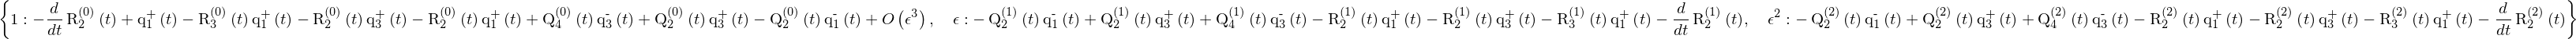

In [3]:
dR2dt = R2.diff(t)
dR2dt_expr = -dR2dt+ q1p*(1-R2-R3) + q3m*Q4 + (q3p-q1m)*Q2-q3p*R2

dR2_dt_by_order =  collect(dR2dt_expr.expand(),epsilon,evaluate=False)
dR2_dt_by_order

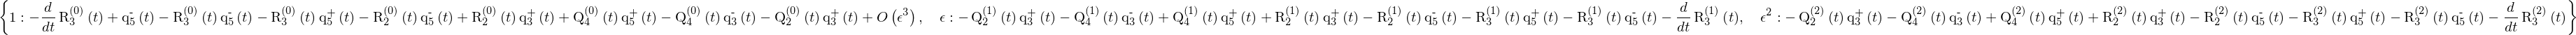

In [4]:
dR3dt = R3.diff(t)
dR3dt_expr = -dR3dt + q3p*(R2-Q2) + q5m*(1-R2-R3)-q5p*R3+(q5p-q3m)*Q4
dR3_dt_by_order =  collect(dR3dt_expr.expand(),epsilon,evaluate=False)
dR3_dt_by_order

In [5]:
dQ2_dt_expr = -epsilon*diff(Q2,t) + q20m*(R2-Q2)-q20p*Q2+epsilon*(q1p*(1-R2-R3)-q1m*Q2)
dQ4_dt_expr = -epsilon*diff(Q4,t) - q40p*Q4+q40m*(R3-Q4) + epsilon*(q3p*(R2-Q2)-q3m*Q4)
dQ4_dt_by_order =  dQ4_dt_expr.expand().collect(epsilon,evaluate=False)
dQ2_dt_by_order =  dQ2_dt_expr.expand().collect(epsilon,evaluate=False)


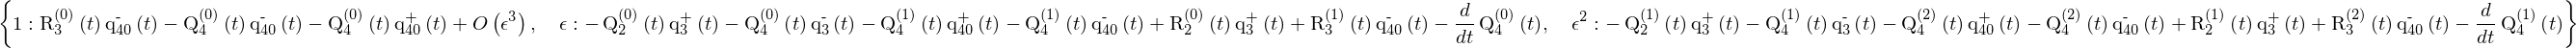

In [6]:
dQ4_dt_by_order

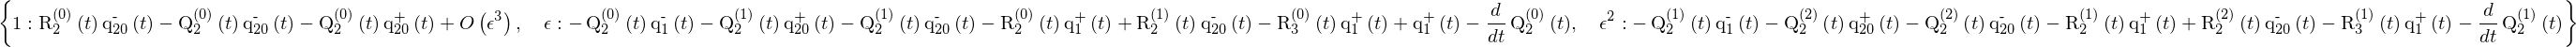

In [7]:
dQ2_dt_by_order

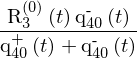

In [8]:
Q40_solution = solve(dQ4_dt_by_order[1].removeO(),Q40)[0]
Q40_solution

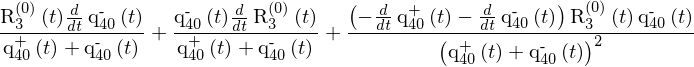

In [9]:
diff(Q40_solution,t)

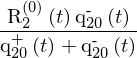

In [10]:
Q20_solution = solve(dQ2_dt_by_order[1].removeO(),Q20)[0]
Q20_solution

In [11]:
dQ20_solution_dt = diff(Q20_solution,t).subs({
    diff(q20m,t): 0,
    diff(q20p,t): 2*q20p/Ca_cyt,
    diff(R20,t): solve(dR2_dt_by_order[1].removeO().subs(Q20,Q20_solution).subs(Q40,Q40_solution), diff(R20,t) )[0]
})

dQ40_solution_dt = diff(Q40_solution,t).subs({
    diff(q40m,t): 2*q40m/Ca_er,
    diff(q40p,t): 0,
    diff(R30,t): solve(dR3_dt_by_order[1].removeO().subs(Q20,Q20_solution).subs(Q40,Q40_solution), diff(R30,t) )[0]
})

dQ20_solution_dt = simplify(dQ20_solution_dt).expand().collect([R20,R30])
dQ40_solution_dt = simplify(dQ40_solution_dt).expand().collect([R20,R30])


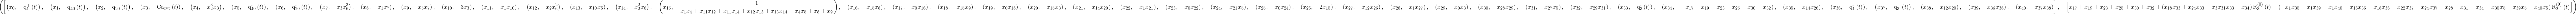

In [12]:
cse(dQ20_solution_dt)

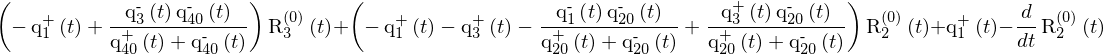

In [13]:

dR2_dt_by_order[1].removeO().subs(Q20,Q20_solution).subs(Q40,Q40_solution).collect([R20,R30])

In [14]:
print_latex(dR2_dt_by_order[1].removeO().subs(Q20,Q20_solution).subs(Q40,Q40_solution).collect([R20,R30]))


\left(- \operatorname{q^{+}_{1}}{\left (t \right )} + \frac{\operatorname{q^{-}_{3}}{\left (t \right )} \operatorname{q_{40}^-}{\left (t \right )}}{\operatorname{q_{40}^+}{\left (t \right )} + \operatorname{q_{40}^-}{\left (t \right )}}\right) \operatorname{R_3^{(0)}}{\left (t \right )} + \left(- \operatorname{q^{+}_{1}}{\left (t \right )} - \operatorname{q^{+}_{3}}{\left (t \right )} - \frac{\operatorname{q^{-}_{1}}{\left (t \right )} \operatorname{q_{20}^-}{\left (t \right )}}{\operatorname{q_{20}^+}{\left (t \right )} + \operatorname{q_{20}^-}{\left (t \right )}} + \frac{\operatorname{q^{+}_{3}}{\left (t \right )} \operatorname{q_{20}^-}{\left (t \right )}}{\operatorname{q_{20}^+}{\left (t \right )} + \operatorname{q_{20}^-}{\left (t \right )}}\right) \operatorname{R_2^{(0)}}{\left (t \right )} + \operatorname{q^{+}_{1}}{\left (t \right )} - \frac{d}{d t} \operatorname{R_2^{(0)}}{\left (t \right )}


In [15]:
dR20dt = simplify(solve(dR2_dt_by_order[1].removeO().subs(Q20,Q20_solution).subs(Q40,Q40_solution),diff(R20,t))[0].collect([R20,R30]))
dR30dt =  simplify(solve(dR3_dt_by_order[1].removeO().subs(Q20,Q20_solution).subs(Q40,Q40_solution),diff(R30,t))[0].collect([R20,R30]))



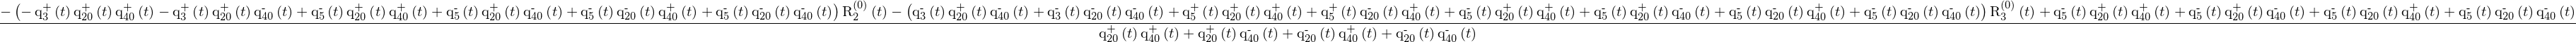

In [16]:
dR30dt

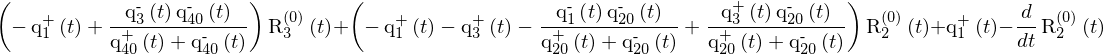

In [17]:
dR2_dt_by_order[1].removeO().subs(Q20,Q20_solution).subs(Q40,Q40_solution).collect([R20,R30])

In [18]:
print_latex(dR3_dt_by_order[1].removeO().subs(Q20,Q20_solution).subs(Q40,Q40_solution).collect([R20,R30]))

\left(\operatorname{q^{+}_{3}}{\left (t \right )} - \operatorname{q^{-}_{5}}{\left (t \right )} - \frac{\operatorname{q^{+}_{3}}{\left (t \right )} \operatorname{q_{20}^-}{\left (t \right )}}{\operatorname{q_{20}^+}{\left (t \right )} + \operatorname{q_{20}^-}{\left (t \right )}}\right) \operatorname{R_2^{(0)}}{\left (t \right )} + \left(- \operatorname{q^{+}_{5}}{\left (t \right )} - \operatorname{q^{-}_{5}}{\left (t \right )} - \frac{\operatorname{q^{-}_{3}}{\left (t \right )} \operatorname{q_{40}^-}{\left (t \right )}}{\operatorname{q_{40}^+}{\left (t \right )} + \operatorname{q_{40}^-}{\left (t \right )}} + \frac{\operatorname{q^{+}_{5}}{\left (t \right )} \operatorname{q_{40}^-}{\left (t \right )}}{\operatorname{q_{40}^+}{\left (t \right )} + \operatorname{q_{40}^-}{\left (t \right )}}\right) \operatorname{R_3^{(0)}}{\left (t \right )} + \operatorname{q^{-}_{5}}{\left (t \right )} - \frac{d}{d t} \operatorname{R_3^{(0)}}{\left (t \right )}


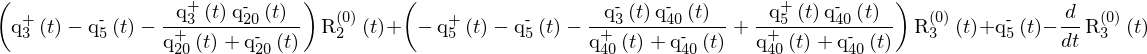

In [19]:
dR3_dt_by_order[1].removeO().subs(Q20,Q20_solution).subs(Q40,Q40_solution).collect([R20,R30])

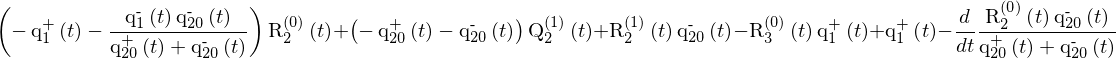

In [40]:
dQ2_dt_by_order[epsilon].subs(
    {
        Q40:Q40_solution,
        Q20:Q20_solution
    }).collect([R20,R30,Q41,R31,Q21])

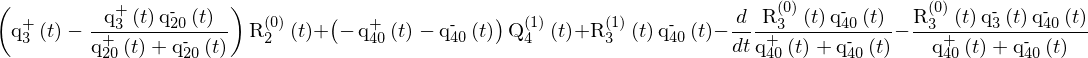

In [37]:
dQ4_dt_by_order[epsilon].subs(
    {
        Q40:Q40_solution,
        Q20:Q20_solution
    }).collect([R20,R30,Q41,R31])

In [38]:
print_latex(dQ4_dt_by_order[epsilon].subs(
    {
        Q40:Q40_solution,
        Q20:Q20_solution
    }).collect([R20,R30,Q41,R31]))

\left(\operatorname{q^{+}_{3}}{\left (t \right )} - \frac{\operatorname{q^{+}_{3}}{\left (t \right )} \operatorname{q_{20}^-}{\left (t \right )}}{\operatorname{q_{20}^+}{\left (t \right )} + \operatorname{q_{20}^-}{\left (t \right )}}\right) \operatorname{R_2^{(0)}}{\left (t \right )} + \left(- \operatorname{q_{40}^+}{\left (t \right )} - \operatorname{q_{40}^-}{\left (t \right )}\right) \operatorname{Q_4^{(1)}}{\left (t \right )} + \operatorname{R_3^{(1)}}{\left (t \right )} \operatorname{q_{40}^-}{\left (t \right )} - \frac{d}{d t} \frac{\operatorname{R_3^{(0)}}{\left (t \right )} \operatorname{q_{40}^-}{\left (t \right )}}{\operatorname{q_{40}^+}{\left (t \right )} + \operatorname{q_{40}^-}{\left (t \right )}} - \frac{\operatorname{R_3^{(0)}}{\left (t \right )} \operatorname{q^{-}_{3}}{\left (t \right )} \operatorname{q_{40}^-}{\left (t \right )}}{\operatorname{q_{40}^+}{\left (t \right )} + \operatorname{q_{40}^-}{\left (t \right )}}


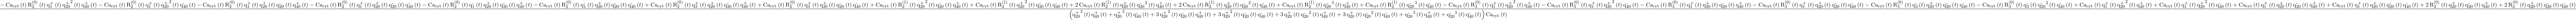

In [21]:
Q21_solution = simplify(solve(dQ2_dt_by_order[epsilon].subs(
    {diff(Q20,t): dQ20_solution_dt,
     diff(Q40,t): dQ40_solution_dt
    }).subs(
    {
        Q40:Q40_solution,
        Q20:Q20_solution
    }).collect([R20,R30,Q21]),Q21 ))[0]

Q21_solution

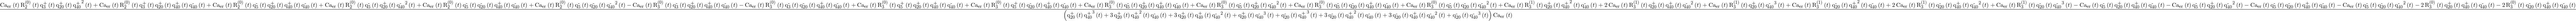

In [22]:
Q41_solution = simplify(solve(dQ4_dt_by_order[epsilon].subs(
    {diff(Q20,t): dQ20_solution_dt,
     diff(Q40,t): dQ40_solution_dt
    }).subs(
    {
        Q40:Q40_solution,
        Q20:Q20_solution
    }).collect([R20,R30,Q21]),Q41 ))[0]

Q41_solution

In [23]:
print_latex(dQ2_dt_by_order[epsilon].subs(Q20,Q20_solution).subs(Q40,Q40_solution).collect([R20,R30,Q21,R21]))

\left(- \operatorname{q^{+}_{1}}{\left (t \right )} - \frac{\operatorname{q^{-}_{1}}{\left (t \right )} \operatorname{q_{20}^-}{\left (t \right )}}{\operatorname{q_{20}^+}{\left (t \right )} + \operatorname{q_{20}^-}{\left (t \right )}}\right) \operatorname{R_2^{(0)}}{\left (t \right )} + \left(- \operatorname{q_{20}^+}{\left (t \right )} - \operatorname{q_{20}^-}{\left (t \right )}\right) \operatorname{Q_2^{(1)}}{\left (t \right )} + \operatorname{R_2^{(1)}}{\left (t \right )} \operatorname{q_{20}^-}{\left (t \right )} - \operatorname{R_3^{(0)}}{\left (t \right )} \operatorname{q^{+}_{1}}{\left (t \right )} + \operatorname{q^{+}_{1}}{\left (t \right )} - \frac{d}{d t} \frac{\operatorname{R_2^{(0)}}{\left (t \right )} \operatorname{q_{20}^-}{\left (t \right )}}{\operatorname{q_{20}^+}{\left (t \right )} + \operatorname{q_{20}^-}{\left (t \right )}}


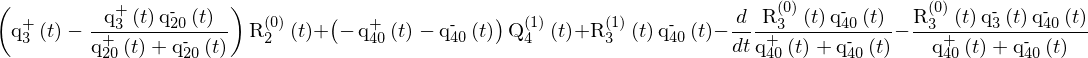

In [24]:
dQ4_dt_by_order[epsilon].subs(Q20,Q20_solution).subs(Q40,Q40_solution).collect([R20,R30,Q41,R31])

In [25]:
print_latex(dQ4_dt_by_order[epsilon].subs(Q20,Q20_solution).subs(Q40,Q40_solution).collect([R20,R30]))

\left(\operatorname{q^{+}_{3}}{\left (t \right )} - \frac{\operatorname{q^{+}_{3}}{\left (t \right )} \operatorname{q_{20}^-}{\left (t \right )}}{\operatorname{q_{20}^+}{\left (t \right )} + \operatorname{q_{20}^-}{\left (t \right )}}\right) \operatorname{R_2^{(0)}}{\left (t \right )} - \operatorname{Q_4^{(1)}}{\left (t \right )} \operatorname{q_{40}^+}{\left (t \right )} - \operatorname{Q_4^{(1)}}{\left (t \right )} \operatorname{q_{40}^-}{\left (t \right )} + \operatorname{R_3^{(1)}}{\left (t \right )} \operatorname{q_{40}^-}{\left (t \right )} - \frac{d}{d t} \frac{\operatorname{R_3^{(0)}}{\left (t \right )} \operatorname{q_{40}^-}{\left (t \right )}}{\operatorname{q_{40}^+}{\left (t \right )} + \operatorname{q_{40}^-}{\left (t \right )}} - \frac{\operatorname{R_3^{(0)}}{\left (t \right )} \operatorname{q^{-}_{3}}{\left (t \right )} \operatorname{q_{40}^-}{\left (t \right )}}{\operatorname{q_{40}^+}{\left (t \right )} + \operatorname{q_{40}^-}{\left (t \right )}}


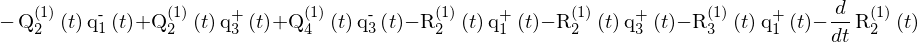

In [26]:
dR2_dt_by_order[epsilon]

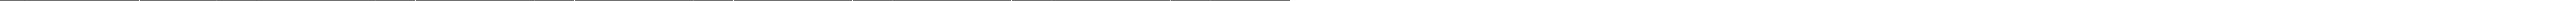

In [27]:
dR2_dt_by_order[epsilon].subs(
    {Q21: Q21_solution,
     Q41: Q41_solution
    }
).expand().collect([R21,R31])

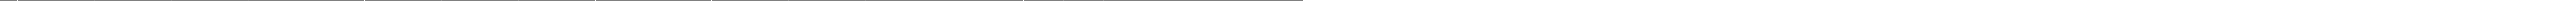

In [28]:
dR3_dt_by_order[epsilon].subs(
    {Q21: Q21_solution,
     Q41: Q41_solution
    }
).expand().collect([R21,R31])

In [29]:
alpha21, alpha41, beta20, beta40, beta22, beta42, beta23, beta43 = map(Fun_t,['\\alpha_{21}', '\\alpha_{41}', '\\beta_{20}', '\\beta_{40}', '\\beta_{22}', '\\beta_{42}', '\\beta_{23}', '\\beta_{43}'])




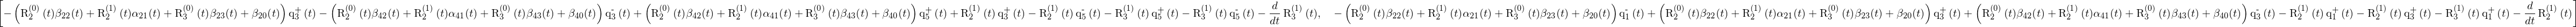

In [30]:
R21R31_eqs = [dR3_dt_by_order[epsilon].subs(
    {Q21: alpha21*R21 + beta20 + beta22*R20 + beta23*R30,
     Q41: alpha41*R21 + beta40 + beta42*R20 + beta43*R30
    }),
     dR2_dt_by_order[epsilon].subs(
    {Q21: alpha21*R21 + beta20 + beta22*R20 + beta23*R30,
     Q41: alpha41*R21 + beta40 + beta42*R20 + beta43*R30
    })]
R21R31_eqs

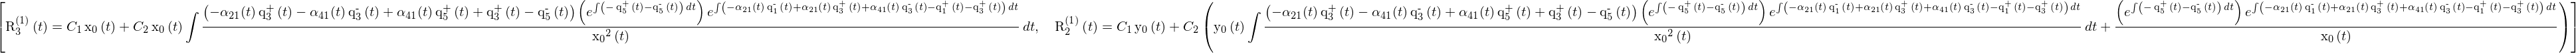

In [31]:
dsolve(R21R31_eqs)